# Классификация MNIST сверточной сетью

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras

In [2]:
train = np.loadtxt('../002/data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('../002/data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

## Визуализируем исходные данные

In [4]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Разбиваем выборку на обучение и валидацию

In [5]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

## Собираем сверточную сеть для обучения

In [6]:
seed = 123457
kernek_initializer = keras.initializers.glorot_normal(seed=seed)
bias_initializer = keras.initializers.normal(stddev=1., seed=seed)

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(6, 
                              kernel_size=(5, 5), 
                              padding='same', 
                              activation='relu', 
                              input_shape=x_train.shape[1:],
                              bias_initializer=bias_initializer,
                              kernel_initializer=kernek_initializer))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(keras.layers.Conv2D(16, 
                              kernel_size=(5, 5),
                              padding='valid',
                              activation='relu', 
                              bias_initializer=bias_initializer,
                              kernel_initializer=kernek_initializer))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(32, activation='relu',
                             bias_initializer=bias_initializer,
                             kernel_initializer=kernek_initializer))

model.add(keras.layers.Dense(10, activation='softmax',
                             bias_initializer=bias_initializer,
                             kernel_initializer=kernek_initializer))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0713 20:25:48.210541  5736 deprecation.py:506] From d:\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1288: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0713 20:25:48.210541  5736 deprecation.py:506] From d:\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Выводим информацию о модели

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12832     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## One hot encoding разметки

In [8]:
y_train_labels = keras.utils.to_categorical(y_train)

In [9]:
y_train[:10]

array([6., 5., 3., 4., 7., 8., 6., 7., 0., 9.])

In [10]:
y_train_labels[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Запускаем обучение

In [11]:
model.fit(x_train, 
          y_train_labels,
          batch_size=32, 
          epochs=5,
          validation_split=0.2)

Train on 26880 samples, validate on 6720 samples
Epoch 1/5
26880/26880 [==============================] - 6s 223us/sample - loss: 0.9482 - acc: 0.7789 - val_loss: 0.2861 - val_acc: 0.9271
Epoch 2/5
26880/26880 [==============================] - 6s 218us/sample - loss: 0.1973 - acc: 0.9469 - val_loss: 0.1696 - val_acc: 0.9530
Epoch 3/5
26880/26880 [==============================] - 6s 213us/sample - loss: 0.1236 - acc: 0.9650 - val_loss: 0.1445 - val_acc: 0.9585
Epoch 4/5
26880/26880 [==============================] - 6s 212us/sample - loss: 0.0941 - acc: 0.9723 - val_loss: 0.1328 - val_acc: 0.9631
Epoch 5/5
26880/26880 [==============================] - 6s 215us/sample - loss: 0.0738 - acc: 0.9778 - val_loss: 0.1081 - val_acc: 0.9735


## Предсказываем класс объекта

In [12]:
pred_val = model.predict_classes(x_val)

In [13]:
pred_val[:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1], dtype=int64)

## Оцениваем качество решение на валидационной выборке

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.9717857142857143


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       816
         1.0       0.99      0.98      0.99       909
         2.0       0.98      0.96      0.97       846
         3.0       0.96      0.98      0.97       937
         4.0       0.96      0.98      0.97       839
         5.0       0.95      0.98      0.97       702
         6.0       0.98      0.99      0.98       785
         7.0       0.98      0.96      0.97       893
         8.0       0.97      0.95      0.96       835
         9.0       0.97      0.96      0.96       838

   micro avg       0.97      0.97      0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[795   0   1   0   1   0   7   0   7   5]
 [  0 895   0   3   5   1   1   3   1   0]
 [  2   4 810   6   8   0   0   9   6   1]
 [  1   0   3 918   0   7   0   3   3   2]
 [  3   0   0   2 823   0   4   1   1   5]
 [  3   0   0   5   0 689   2   1   1   1]
 [  6   0   0   0   0   4 774   0   1   0]
 [  0   1  15   5   2   2   0 859   1   8]
 [  3   0   1  10   7  11   3   1 797   2]
 [  3   0   0   5  14   9   0   2   2 803]]


## Предсказания на тестовыйх данных

In [17]:
pred_test = model.predict_classes(test_img)

## Визуализируем предсказания

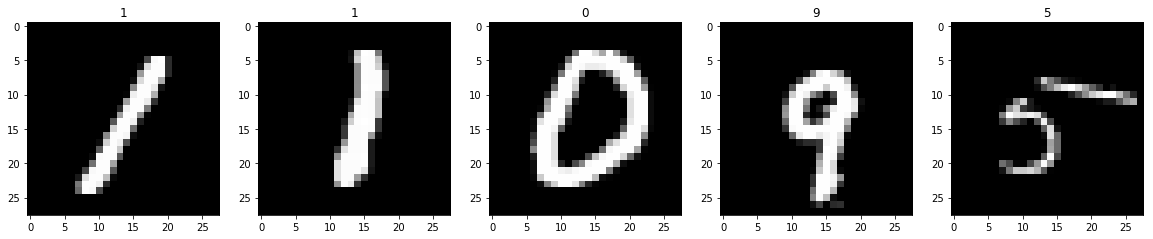

In [18]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(test_img)), 5)
img_prediction = zip(test_img[indices], pred_test[indices])
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[...,0], cmap='gray');
    subplot.set_title('%d' % pred);

## Готовим файл для отправки

In [19]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%d\n' % (i, p))

In [ ]:
# Your submission scored 0.96814